In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv(r'C:\Users\KSSEEB\OneDrive\Documents\Machine Learning\polynomial regression\data (1).csv')
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
df.tail()

,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [4]:
df.shape

(6, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [6]:
df.isnull().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [9]:
df.drop('sno', axis = 1 , inplace = True)

In [10]:
col = df.columns.tolist()
col

['Temperature', 'Pressure']

Temperature


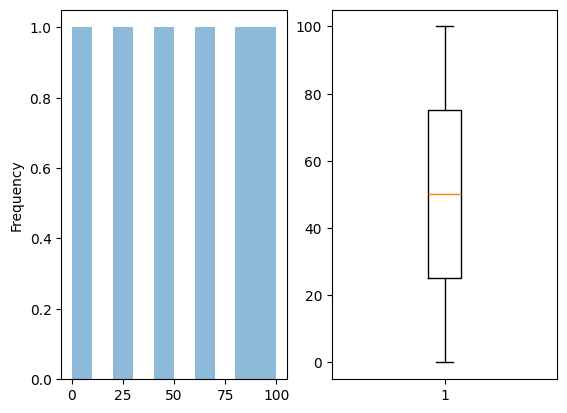

Pressure


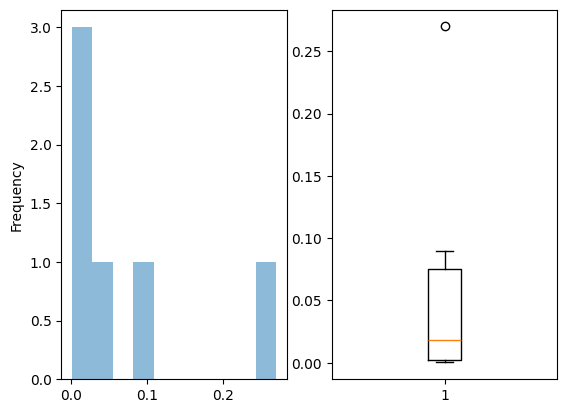

In [11]:
for i in col:
    print(i)
    plt.subplot(1,2,1)
    df[i].plot(kind='hist',bins=10,alpha=0.5)

    plt.subplot(1,2,2)
    plt.boxplot(df[i])

    plt.show()

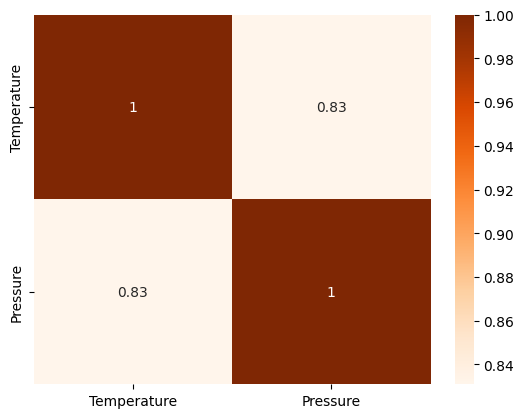

In [12]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True,cmap='Oranges')
plt.show()

In [13]:
# Features and the target variables
X = df[['Temperature']]
y = df[['Pressure']]

# Fitting Linear Regression to the dataset
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
y_pred = model.predict(X)

Text(0, 0.5, 'pressure')

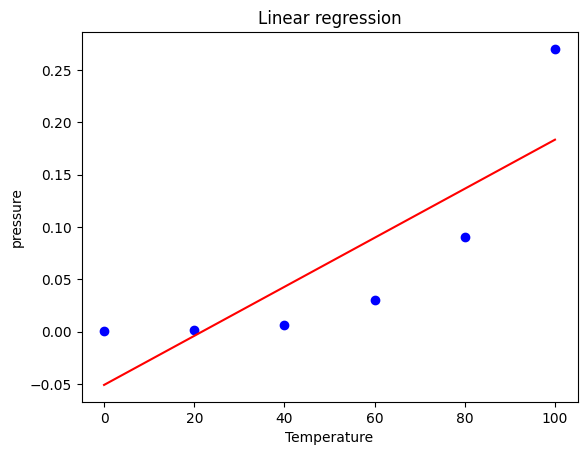

In [15]:
# visualising the linear regression results
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred, color='red')
plt.title('Linear regression')
plt.xlabel('Temperature')
plt.ylabel('pressure')

In [29]:
# Fitting Polynomial Regression to the dataset
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

model1 = LinearRegression()
model1.fit(X_poly, y)

LinearRegression()

In [30]:
y_pred = model1.predict(poly.fit_transform(X))
y_pred

array([[2.00000314e-04],
       [1.20000006e-03],
       [5.99999994e-03],
       [2.99999999e-02],
       [8.99999998e-02],
       [2.70000000e-01]])

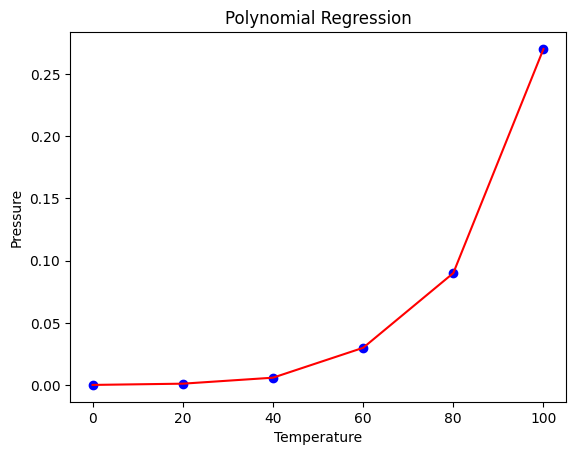

In [31]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 4   # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_train_poly)


# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2_train = r2_score(y_train, y_pred)

print("RMSE:", train_rmse)
print("R-squared:", r2_train)

RMSE: 1.6584684508283586e-15
R-squared: 1.0


The Root Mean Squared Error (RMSE) is a measure of the differences between the predicted and actual values in a regression model. It represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit of the model to the data.